In [4]:
import numpy as np

import cv2 as cv
import matplotlib.pyplot as plt

from cv_utils import get_grid_mask, verify_grid, find_corners_from_contour, crop_and_warp

In [5]:
path = '../data/train/image1036.jpg'
image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

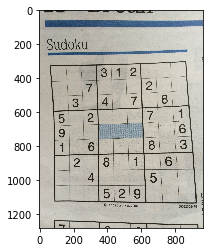

In [6]:
plt.imshow(image)

In [7]:
mask, h, v = get_grid_mask(image)

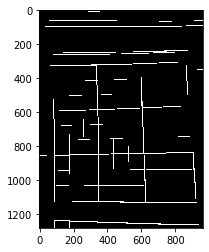

In [8]:
plt.imshow(mask, cmap='gray')

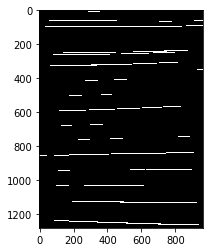

In [9]:
plt.imshow(h, cmap='gray')

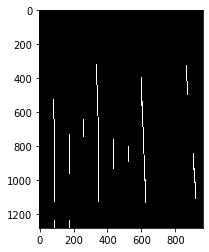

In [10]:
plt.imshow(v, cmap='gray')

In [11]:
# Find intersections between the lines to determine if the intersections are grid joints.
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# if a exists, it has to be the biggest polygon
contours = sorted(contours, key=cv.contourArea, reverse=True)

intersections = cv.bitwise_and(h, v)

In [12]:
li = []
for grid_number, contour in enumerate(contours):

    # verify that Region of Interest (ROI) is a table
    rect = verify_grid(contour, intersections)
    if rect is None:
        continue

    corners = find_corners_from_contour(contour)
    new_image = crop_and_warp(image, corners)
    new_image = cv.resize(new_image, (512, 512))
    
    li.append(new_image)

In [13]:
len(li)

1

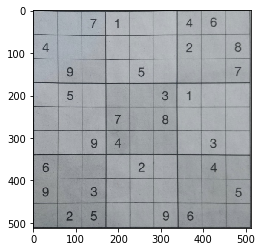

In [14]:
ref_sudoku = cv.cvtColor(cv.imread('../data/ref_sudoku.jpg'), cv.COLOR_BGR2RGB)
plt.imshow(ref_sudoku, cmap = 'gray')

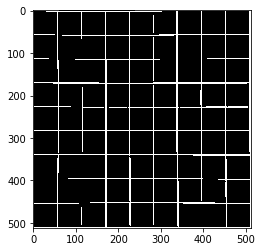

In [15]:
ref_mask, _, _ = get_grid_mask(ref_sudoku)
plt.imshow(ref_mask, cmap = 'gray')

In [16]:
d = np.argwhere(ref_mask == 255.0).shape[0]

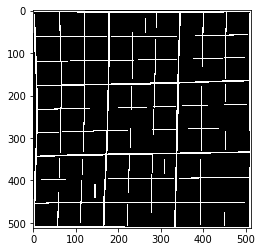

In [17]:
m, _, _ = get_grid_mask(li[0])
plt.imshow(m, cmap='gray')

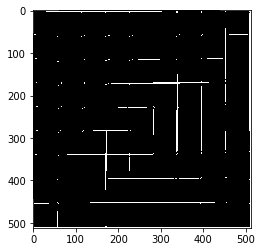

In [18]:
diff = np.bitwise_and(m, ref_mask)
plt.imshow(diff, cmap='gray')

In [19]:
n = np.argwhere(diff == 255.0).shape[0]

In [20]:
print(n, d, n/d)

7979 24486 0.3258596749162787


In [32]:
man = np.zeros((512, 512))

count = 0
for i in range(512):
    for j in range(512):
        if ref_mask[i][j] == 255.0:
            region = m[i-8:i+8, j-8: j+8]
            if np.sum(region) > 0:
                count += 1
                man[i][j] = 255.0
count


21746

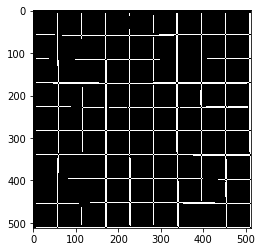

In [33]:
plt.imshow(man, cmap='gray')